# VARNA

[VARNA](http://varna.lri.fr/index.php) is a java applet made by [Yann Ponty](http://www.lix.polytechnique.fr/~ponty/) that can be instrumented to generate figures. It's originally from 2009, last updated 2015. Still works.

Assuming you have java locally installed, to use it you just need the jar: `wget https://varna.lri.fr/bin/VARNAv3-93.jar`.

A [team at inria](https://raweb.inria.fr/rapportsactivite/RA2017/amibio/uid0.html) made a python interface to it called [varna-api](https://htyao.gitlab.io/varna-api/). Installable through pip: `pip install varnaapi`.

See [this file](https://gitlab.inria.fr/amibio/varna-api/-/blob/master/src/varnaapi/models.py) for the core of it.

In [1]:
path_to_varna = './VARNAv3-93.jar'

import varnaapi; print(f'varnaapi: {varnaapi.__version__}')
varnaapi.set_VARNA(path_to_varna)
print(f'VARNA jar path: {path_to_varna}')

import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib; print(f'Matplotlib: {matplotlib.__version__}')
import IPython; print(f'IPython: {IPython.__version__}')

import tempfile
import numpy as np
!python -V

varnaapi: 1.0.0
VARNA jar path: ./VARNAv3-93.jar
Matplotlib: 3.6.0
IPython: 7.27.0
Python 3.9.7


In [2]:
def scale_colors(colors_dict, as_hex=True, cmap=None, reverse=False):
    '''
    A dictionary with values containing scalars which need to 
    be scaled according to some color map. The keys are irrelevant.
    The color map will be normalized to the range of values within 
    color_dict.
    :param colors_dict: Dictionary of k=nucleotide_index, v=color as float.
    :param as_hex: Boolean, if True then returns '#RRGGBB' hex string rather than (r,g,b)
    :param cmap: A color map to be used to scale the colors.
    :param reverse: Reverse the color map
    :return: Another dictionary containing rgb triples as values.
    '''
    # This code adapted from: https://github.com/ViennaRNA/forgi/blob/0fca4a85bbe74f3e12cf1505e37a713c4454d34c/forgi/visual/fornac.py
    
    if cmap is None:
        import matplotlib.pyplot as plt
        cmap = plt.get_cmap('Blues')

    values = colors_dict.values()
    min_value = min(values)
    max_value = max(values)

    new_dict = {}
    for key in colors_dict:
        if reverse:
            color = cmap(
                1 - ((colors_dict[key] - min_value) / (max_value - min_value)))
        else:
            color = cmap(
                (colors_dict[key] - min_value) / (max_value - min_value))
        r,g,b = int(255 * color[0]), int(255 * color[1]), int(255 * color[2])
        
        new_dict[key] = (r,g,b) if not as_hex else "#{r:02x}{g:02x}{b:02x}".format(r=r, g=g, b=b)

    return new_dict

def varna_plot(seq, struct, shape_data, save_to_file=None):
    v = varnaapi.Structure(sequence=seq, structure=struct)
    
    nucleotide_colors = scale_colors(dict((i, v) for i,v in enumerate(shape_data)),
                                 cmap=plt.get_cmap('coolwarm'))
    for bi, c_rgb in nucleotide_colors.items():
        v.add_bases_style(varnaapi.param.BasesStyle(fill=c_rgb), [bi])
    
    fn = None
    if save_to_file is None:
        tf = tempfile.NamedTemporaryFile(suffix='.png')
        v.savefig(tf.name)
        im = Image(tf.name)
        tf.close()
    else:
        v.savefig(save_to_file)
        im = Image(filename=save_to_file)
    return im

['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGGUCCUGUGUUCGAUCCACAGAAUUCGCACCA', '-structureDBN', '(((((((..((((........)))).(((((.......))))).....(((((.......))))))))))))....', '-o', '/tmp/tmpu_5lekpn.png', '-basesStyle1', 'fill=#ecd1c3', '-applyBasesStyle1on', '1', '-basesStyle2', 'fill=#e9d4c9', '-applyBasesStyle2on', '2', '-basesStyle3', 'fill=#e9d4c9', '-applyBasesStyle3on', '3', '-basesStyle4', 'fill=#e9d4c9', '-applyBasesStyle4on', '4', '-basesStyle5', 'fill=#e9d4c9', '-applyBasesStyle5on', '5', '-basesStyle6', 'fill=#e9d4c9', '-applyBasesStyle6on', '6', '-basesStyle7', 'fill=#e9d4c9', '-applyBasesStyle7on', '7', '-basesStyle8', 'fill=#ebd3c6', '-applyBasesStyle8on', '8', '-basesStyle9', 'fill=#e9d4c9', '-applyBasesStyle9on', '9', '-basesStyle10', 'fill=#ebd3c6', '-applyBasesStyle10on', '10', '-basesStyle11', 'fill=#e9d4c9', '-applyBasesStyle11on', '11', '-basesStyle12', 'fill=#e9d4c9'

Output file: /tmp/tmpu_5lekpn.png



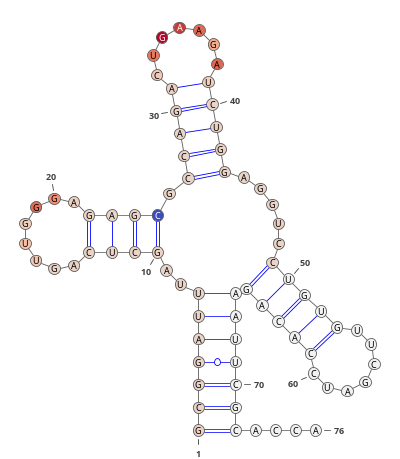

In [3]:
seq    = 'GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGGUCCUGUGUUCGAUCCACAGAAUUCGCACCA'
struct = '(((((((..((((........)))).(((((.......))))).....(((((.......))))))))))))....'
shape_data = [0.049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.02, 0.0, 0.0, 0.01, 0.039, 0.02, 0.205, 0.302, 0.127,
              1.052, 0.779, 0.068, 0.01, 0.0, 0.0, -2, 0.01, 0.0, 0.01, 0.0, 0.0, 0.039, 0.175, 0.964, 1.607, 1.383, 
              1.081, 0.546, 1.11, 0.107, 0.01, 0.049, 0.029, 0.01, 0.01, 0.0, 0.01, 0.078, 0.01, 0.0, 0.0, 0.0, 0.02, 
              0.0, 0.01, 0.058, 0.01, 0.01, 0.01, 0.02, 0.029, 0.0, 0.0, 0.01, 0.01, 0.0, 0.01, 0.01, 0.0, 0.0, 0.0, 
              0.0, 0.088, 0.536, 0.273, 0.409, 0.984]

im = varna_plot(seq=seq, struct=struct, shape_data=shape_data)
display(im)